In [1]:
import mlrose
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def __discrete_iteration_problems(problem,algorithm,length, max_iter,max_attempt, init_state, edges=None,coords=None):
    if problem == 'fourpeaks':
        __fit = mlrose.FourPeaks()
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True, max_val=2)
    elif problem == 'kcolor':
        __fit = mlrose.MaxKColor(edges=edges)
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True)
    elif problem == 'flipflop':
        __fit = mlrose.OneMax()
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True, max_val=2)
    elif problem == 'continouspeaks':
        __fit = mlrose.ContinuousPeaks()
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True, max_val=2)
    elif problem == 'travellingsales':
        __fit = mlrose.TravellingSales(coords=coords)
        __problem = mlrose.DiscreteOpt(length=length, fitness_fn = __fit, maximize=True, max_val=2)
    
    if algorithm == 'random_hill_climb':
        start_time = time.time()
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(__problem, max_iters = max_iter,max_attempts=max_attempt,init_state=init_state,curve=True)
        end_time = time.time() - start_time
    elif algorithm == 'simulated_annealing':
        start_time = time.time()
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(__problem, max_iters = max_iter,max_attempts=max_attempt,init_state=init_state,curve=True)
        end_time = time.time() - start_time
    elif algorithm == 'genetic_alg':
        start_time = time.time()
        best_state, best_fitness, best_curve = mlrose.genetic_alg(__problem, max_iters = max_iter,max_attempts=max_attempt,curve=True)
        end_time = time.time() - start_time
    elif algorithm == 'mimic':
        start_time = time.time()
        best_state, best_fitness, best_curve = mlrose.mimic(__problem, max_iters = max_iter,max_attempts=max_attempt,curve=True)
        end_time = time.time() - start_time
    #print(best_curve, end_time)
    return best_curve, end_time

In [3]:
def train_discrete_iteration_problem(problem, length=100,max_iter=100000,max_attempt=100):
    __fitness_curve_ = {}
    for algorithm in ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic']:
        print(algorithm)
        init_state = np.random.randint(2,size=length)
        best_curve, time = None, None
        if problem == 'flipflop':
            best_curve, time = __discrete_iteration_problems(problem,algorithm,length, max_iter,max_attempt,init_state, edges=None,coords=None) 

        elif problem == 'fourpeaks':
            best_curve, time = __discrete_iteration_problems(problem,algorithm,length, max_iter,max_attempt,init_state, edges=None,coords=None) 

        elif problem == 'kcolor':
            #edge_list = []
            #while len(edge_list) < i:
            #    new_coord = createNewEdge()
            #    if new_coord not in edge_list:
            #        edge_list.append(new_coord)
            edge_list = []
            edge_list = [(random.randrange(0, length), random.randrange(0, length)) for i in range(length)]
            best_curve, time = __discrete_iteration_problems(problem,algorithm,length, max_iter, max_attempt,init_state, edges=edge_list) 
        
        elif problem == 'continouspeaks':
            best_curve, time = __discrete_iteration_problems(problem,algorithm,length, max_iter,max_attempt,init_state, edges=None,coords=None)
        
        elif problem == 'travellingsales':
            coords = [(random.randrange(0, length), random.randrange(0, length)) for i in range(length)]
            best_curve, time = __discrete_iteration_problems(problem,algorithm,length, max_iter,max_attempt,init_state, edges=None,coords=coords)

        __fitness_curve_[algorithm] = {'fitness_curve': best_curve, 'times': time}
    return __fitness_curve_

In [4]:
def plot_discrete_iteration(y_axis,results,x_label,y_label,title,filename):
    [plt.plot(results[algorithm][y_axis],label=algorithm)  for algorithm in ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'mimic'] ]
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='best')
    plt.savefig(filename)
    plt.show()
    plt.clf()

In [5]:
__length = 100
__max_iter = 5000
__max_attempt=5000
__fitness_vals = train_discrete_iteration_problem('flipflop',__length, __max_iter,__max_attempt)

random_hill_climb
simulated_annealing
genetic_alg
mimic


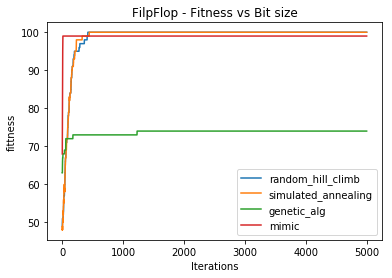

<Figure size 432x288 with 0 Axes>

In [6]:
plot_discrete_iteration('fitness_curve',__fitness_vals,'Iterations','fittness','FilpFlop - Fitness vs Bit size','flipflop_fitness_iterations2.png')


In [8]:
__length = 100
__max_iter = 5000
__max_attempt=5000

__fitness_vals = train_discrete_iteration_problem('fourpeaks',__length, __max_iter,__max_attempt)

random_hill_climb
simulated_annealing
genetic_alg
mimic


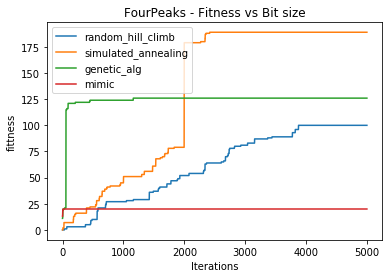

<Figure size 432x288 with 0 Axes>

In [9]:
plot_discrete_iteration('fitness_curve',__fitness_vals,'Iterations','fittness','FourPeaks - Fitness vs Bit size','fourpeaks_fitness_iterations2.png')


In [ ]:
__length = 100
__max_iter = 5000
__max_attempt=5000

__fitness_vals = train_discrete_iteration_problem('kcolor',__length, __max_iter,__max_attempt)

random_hill_climb
simulated_annealing
genetic_alg
mimic


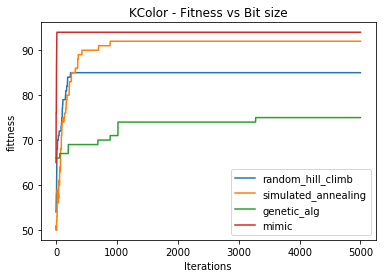

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_discrete_iteration('fitness_curve',__fitness_vals,'Iterations','fittness','KColor - Fitness vs Bit size','kcolor_fitness_iterations2.png')


In [ ]:
__length = 100
__max_iter = 5000
__max_attempt=5000

__fitness_vals = train_discrete_iteration_problem('continouspeaks',__length, __max_iter,__max_attempt)

random_hill_climb
simulated_annealing
genetic_alg
mimic


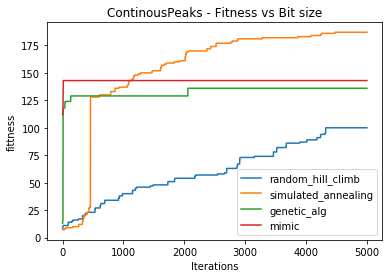

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_discrete_iteration('fitness_curve',__fitness_vals,'Iterations','fittness','ContinousPeaks - Fitness vs Bit size','continouspeaks_fitness_iterations2.png')
